<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2020-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 2: Métodos no supervisados

A lo largo de esta práctica veremos como aplicar distintas técnicas no supervisadas
así como algunas de sus aplicaciones reales:

 - **Clustering con distintas estrategias**: k-means y regla del codo, basadas en densidad y jerárquicas.
 - **Optimización con reducción de dimensionalidad**: t-SNE.
 - **Aplicación**: identificación de puntos de interés turísticos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nombre y apellidos:</strong>
</div>

STEFANIE KOBSAR RODRIGUEZ

---

Para ello vamos a necesitar las siguientes librerías:

In [1]:
import random

import numpy as np
import pandas as pd
from sklearn import cluster      # Algoritmos de clustering.
from sklearn import datasets     # Crear datasets.
from sklearn import manifold    # Algoritmos de reduccion de dimensionalidad.
from sklearn.cluster import KMeans 


# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Métodos de *clustering* (4 puntos)

Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

### Generación de los conjuntos de datos

In [2]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.6, random_state=42)
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=.07, random_state=42)
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05, random_state=42)

Cada dataset tiene 2 variables: una variable *X* que contiene 2 features (columnas) y tantas filas como muestras. Y una variable *y* que alberga las etiquetas que identifican cada cluster.

A lo largo del ejercicio no se usará la variable *y* (sólo con el objetivo de visualizar). El objetivo es a través de los distintos modelos de *clustering* conseguir encontrar las estructuras descritas por las variables *y*.

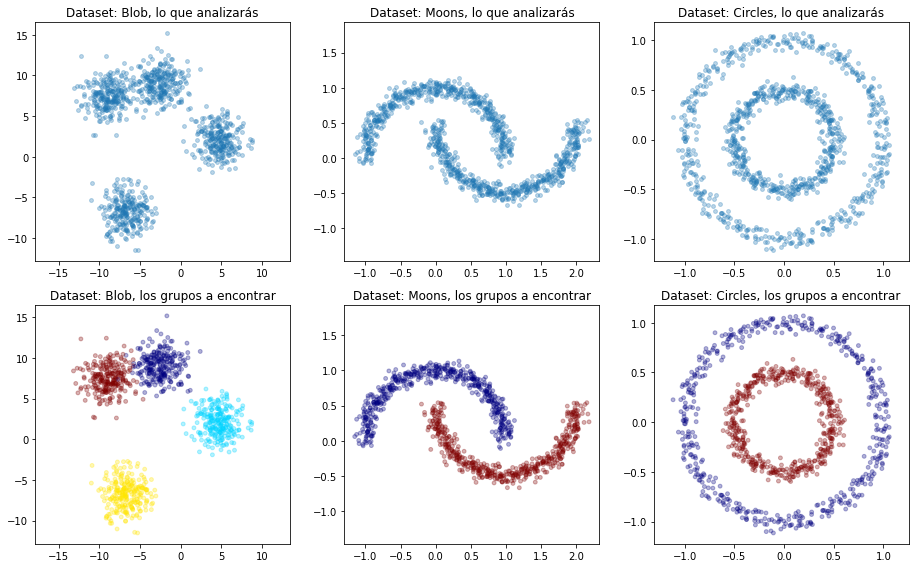

In [3]:
fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         [None] * 3 + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):
    ax.set_title('Dataset: {}, '.format(name) + ('lo que analizarás' if i < 3 else 'los grupos a encontrar'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.3, cmap='jet')
    ax.axis('equal')
plt.tight_layout()

### 1 a. K-means

En este apartado se pide probar el algoritmo *k-means* sobre los tres datasets presentados anteriormente ajustando con los parámetros adecuados y analizar sus resultados.

Para estimar el número de clusters a detectar por *k-means*. Una técnica para estimar $k$ es, como se explica en la teoría:
> Los criterios anteriores (minimización de distancias intra grupo o maximización de distancias inter grupo) pueden usarse para establecer un valor adecuado para el parámetro k. Valores k para los que ya no se consiguen mejoras significativas en la homogeneidad interna de los segmentos o la heterogeneidad entre segmentos distintos, deberían descartarse.

Lo que popularmente se conocer como *regla del codo*.

Primero es necesario calcular la suma de los errores cuadráticos ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consiste en la suma de todos los errores (distancia de cada punto a su centroide asignado) al cuadrado.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

Donde $K$ es el número de clusters a buscar por *k-means*, $x \in C_i$ son los puntos que pertenecen a i-ésimo cluster, $c_i$ es el centroide del cluster $C_i$ (al que pertenece el punto $x$), y $euclidean$ es la [distancia euclídea](https://en.wikipedia.org/wiki/Euclidean_distance).

Este procedimiento realizado para cada posible valor $k$, resulta en una función monótona decreciente, donde el eje $x$ representa los distintos valores de $k$, y el eje $y$ el $SSE$. Intuitivamente se podrá observar un significativo descenso del error, que indicará el valor idóneo de $k$.

**Se pide realizar la representación gráfica de la regla del codo junto a su interpretación, utilizando la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Blobs.
</div>

Regla del codo: valor más óptimo de k para el conjunto de datos Blobs

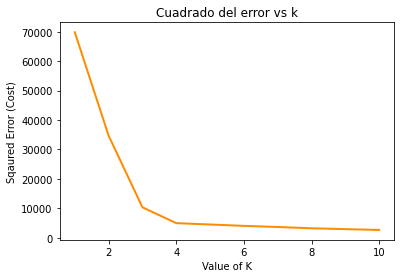

In [4]:
def k_elbow(X_values):
    cost =[] 
    for i in range(1, 11): 
        KM = KMeans(n_clusters = i, max_iter = 500) 
        KM.fit(X_values) 

        # calculates squared error 
        # for the clustered points 
        cost.append(KM.inertia_)      

    # plot the cost against K values 
    plt.plot(range(1, 11), cost, color ='darkorange', linewidth ='2') 
    plt.xlabel("Value of K") 
    plt.ylabel("Sqaured Error (Cost)") 
    plt.title("Cuadrado del error vs k")
    plt.show() # clear the plot 
  
k_elbow(X_blobs)

Un buen primer valor de aproximación se encontrará cercano a 4 ya que es el valor de centroides que arroja un valor menor en el error cuadrático. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

Es muy recomendable dentro de unas buenas prácticas a la hora de hacer el análisis preliminar del set de datos con el que se trabaja. Permite realizar una primera aproximación a los valores de k que pueden ser usados para entrenar el modelo, dato que permite ahorrar coste computacional al entrenamiento y mejorar el rendimeinto del proceso. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Blobs.
</div>

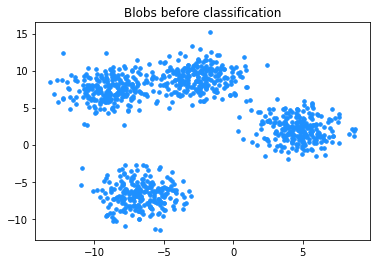

In [5]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, marker=".", c = "dodgerblue")
plt.title("Blobs before classification")
plt.show()

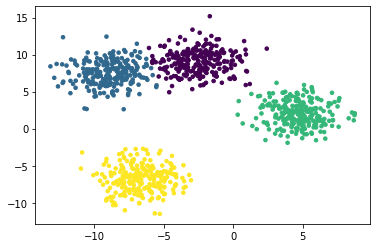

In [6]:
from sklearn.preprocessing import StandardScaler

X, y = X_blobs, y_blobs

def k_means(cluster_number, X_train, y_train):

    X, y = X_train, y_train
    
    km = KMeans(
        n_clusters=cluster_number, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0)

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)

    y_km = km.fit_predict(X)
    
    plt.scatter(X_train[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis', marker=".")

    
k_means(4, X_blobs, y_blobs)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

El algortimo kmeans se ha ejecutado, y el modelo se ha podido entrenar satisfactoriamente para separar los 4 conjuntos de datos. Se puede apreciar 4 clusters diferenciados por colores en el scatter plot de los datos de salida. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Moons.
</div>

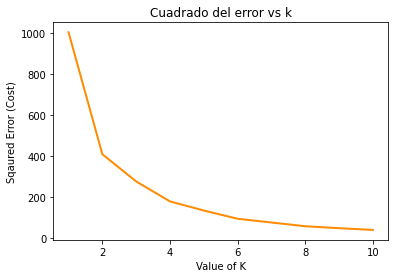

In [7]:
k_elbow(X_values=X_moons)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

En este caso no es tan clara la elección del valor de k. Se aprecia un claro cambio en la pendiente en k=2, y otro cambio (aunque ligero) en k=4. Habrá que probar manualmente ambos valores. Creo que el problema no es la detección en si del valor de k, sino la propia limitación de los datos que se quieren conseguir. La evolución del error no tiene en cuenta la geometría de lo datos, y al usarse el algoritmo k-mean para estimar como evoluciona el error vs el valor de k, este análisis sigue supeditado a la separación lineal de las fronteras de los clusters. Cuando el conjunto de datos no sigue una frontera lineal, la evaluación d k vs el error no deja de ser un buen punto de inicio, pero no una buena descripción de la realidad. 

La estimación del número de clusters se podría mejorar a través del análisis de VAPs y VEPs que genera la construcción de la matriz de Laplace. 

Referencia: https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html

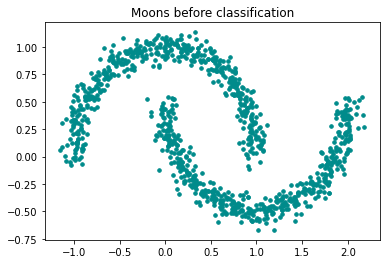

In [8]:
plt.scatter(X_moons[:, 0], X_moons[:, 1], s=50, marker=".", c = "darkcyan")
plt.title("Moons before classification")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Moons.
</div>

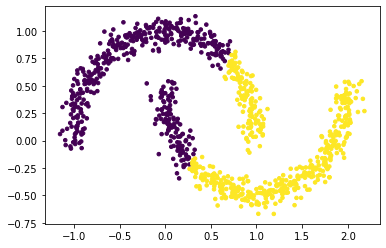

In [9]:
#K-means; k=2

k_means(2, X_moons, y_moons)

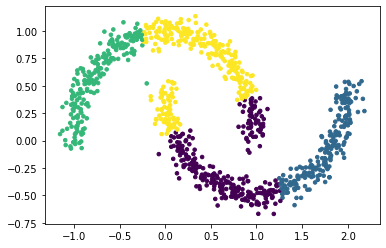

In [10]:
k_means(4, X_moons, y_moons)

Se observa que la separación de datos no es correcta ni para k=2 o k=4. Aquí se puede observar una de las limitaciones del algoritmo k-means: la separación de los clusters siempre será lineal. 

K-means se basa en que los puntos estarán más cerca de su propio centro de grupo que de otros, lo que significa que el algoritmo a menudo será ineficaz si los grupos tienen geometrías complicadas. En particular, los límites entre los clústeres de k-medias siempre serán lineales, lo que significa que fallará para los límites más complicados. 

Para poder conseguir una separación correcta de los datos habrá que aplicar k-means con alguna modificación. 

/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


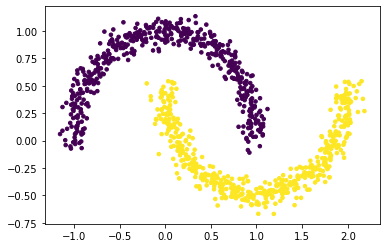

In [11]:
from sklearn.cluster import SpectralClustering

X, y = X_moons, y_moons

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker=".");

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

El agrupamiento espectral es muy útil cuando la estructura de los grupos individuales es muy no convexa o, más en general, cuando una medida del centro y la extensión del grupo no es una descripción adecuada del grupo completo. Por ejemplo, cuando los grupos son círculos anidados en el plano 2D. Si la afinidad es la matriz de adyacencia de un gráfico, este método se puede utilizar para encontrar cortes de gráfico normalizados.

Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Circles.
</div>

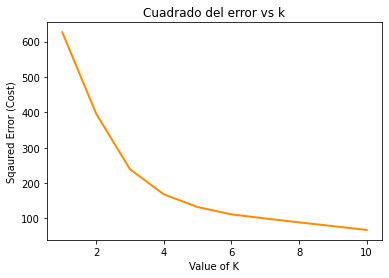

In [12]:
k_elbow(X_circles)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

Al saber el número de clústers que necesitamos con anterioridad, se puede ver que el cálculo del error vs el valor de k no aporta información al número de clusters óptimo que necesita el modelo para realizar bien la tarea de clasificación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Circles.
</div>

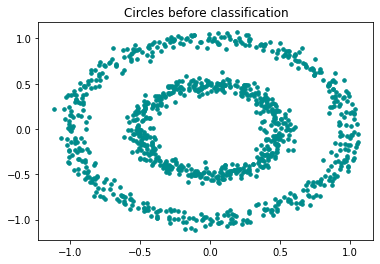

In [13]:
plt.scatter(X_circles[:, 0], X_circles[:, 1], s=50, marker=".", c = "darkcyan")
plt.title("Circles before classification")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

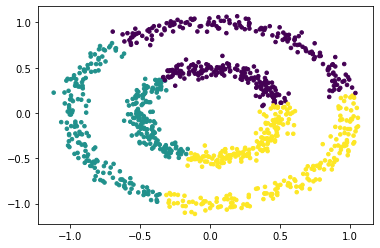

In [14]:
k_means(3, X_circles, y_circles)


/Users/Stephi/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


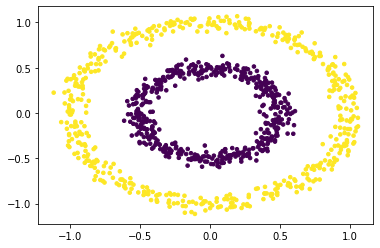

In [15]:
X, y = X_circles, y_circles

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', marker=".");

### 1 b. Algoritmos basados en densidad: DBScan

En este apartado se pide aplicar clustering por densidad como [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) a los datasets anteriores para detectar los grupos subyacentes.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN en scikit-learn</a> jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Blobs.
</div>

In [16]:
from sklearn.cluster import DBSCAN

def apply_dbsan(X_train, y_train, epsilon, min_samples):
    X, y = X_train, y_train

    db = DBSCAN(eps = epsilon

                , min_samples = min_samples).fit(X)

    labels = db.labels_
    fig = plt.figure(figsize=(5, 5))
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])

    plt.show()

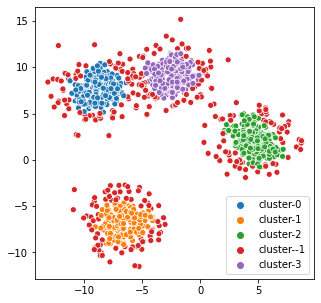

In [17]:
apply_dbsan(X_blobs, y_blobs, 0.65, 10)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de DBScan jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Moons.
</div>

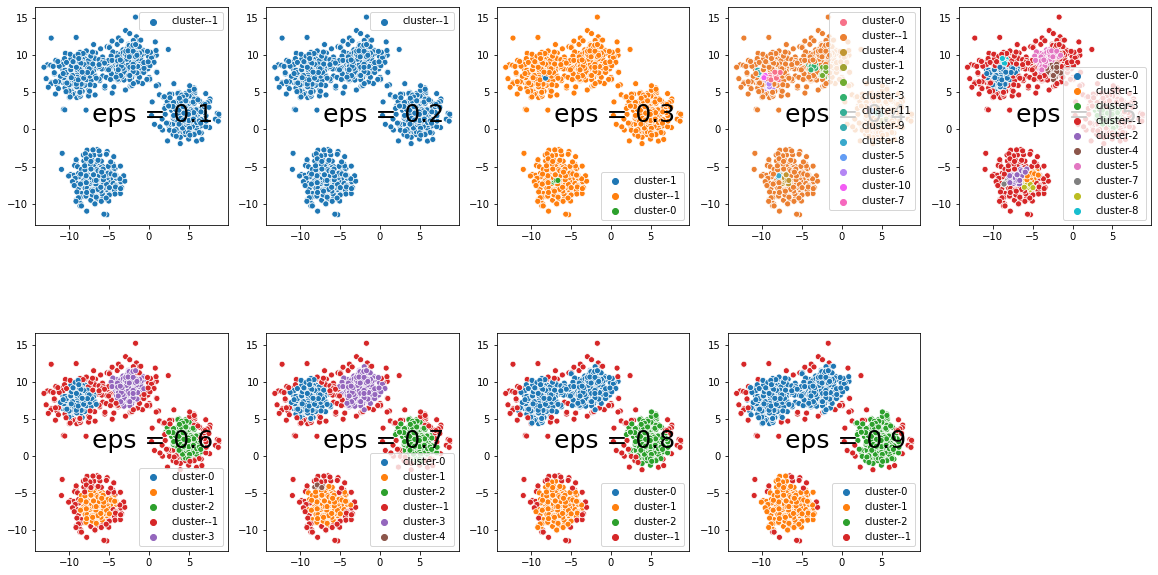

In [18]:


list_eps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def range_of_eps_dbscan(list_of_ranges_to_study, X_train, min_samples):
    fig = plt.figure(figsize=(20, 10))
    fig.subplots_adjust(hspace=.5, wspace=.2)
    
    i = 1
    
    for eps in list_of_ranges_to_study:
        
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_train)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        #print(eps)
        ax = fig.add_subplot(2, 5, i)
        ax.text(0.5, 1, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
        sns.scatterplot(X_train[:,0], X_train[:,1], hue=["cluster-{}".format(x) for x in labels])

        i += 1
        

range_of_eps_dbscan(list_eps, X_blobs, 10)


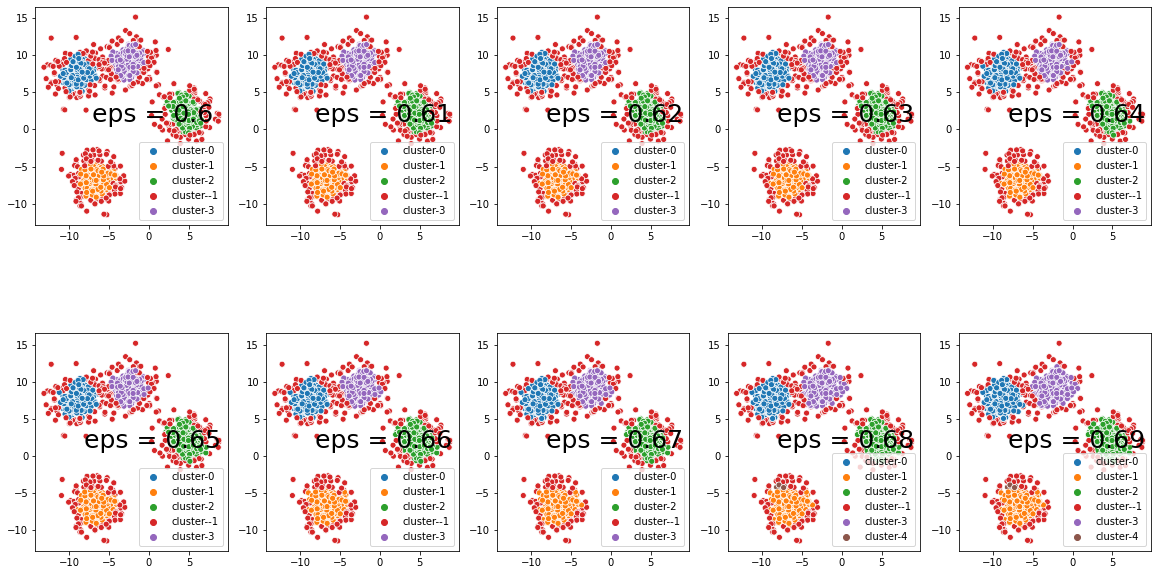

In [19]:
list_eps_detail = np.arange(0.6, 0.7, 0.01).tolist()

range_of_eps_dbscan(list_eps_detail, X_blobs, 10)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Se escoge el valor eps = 0.65 para el problema blobs. Se precede de igual manera para determinar que valor de min samples más óptimo. 



In [20]:
def range_of_minsamples_dbscan(list_of_minsamples, X_train, epsilon):
    fig = plt.figure(figsize=(20, 10))
    fig.subplots_adjust(hspace=.5, wspace=.2)
    
    i = 1
    
    for min in list_of_minsamples:
        
        db = DBSCAN(eps=epsilon, min_samples=min).fit(X_train)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        #print(eps)
        ax = fig.add_subplot(2, 5, i)
        ax.text(0.5, 1, "min = {}".format(round(min, 2)), fontsize=25, ha="center")
        sns.scatterplot(X_train[:,0], X_train[:,1], hue=["cluster-{}".format(x) for x in labels])

        i += 1
        

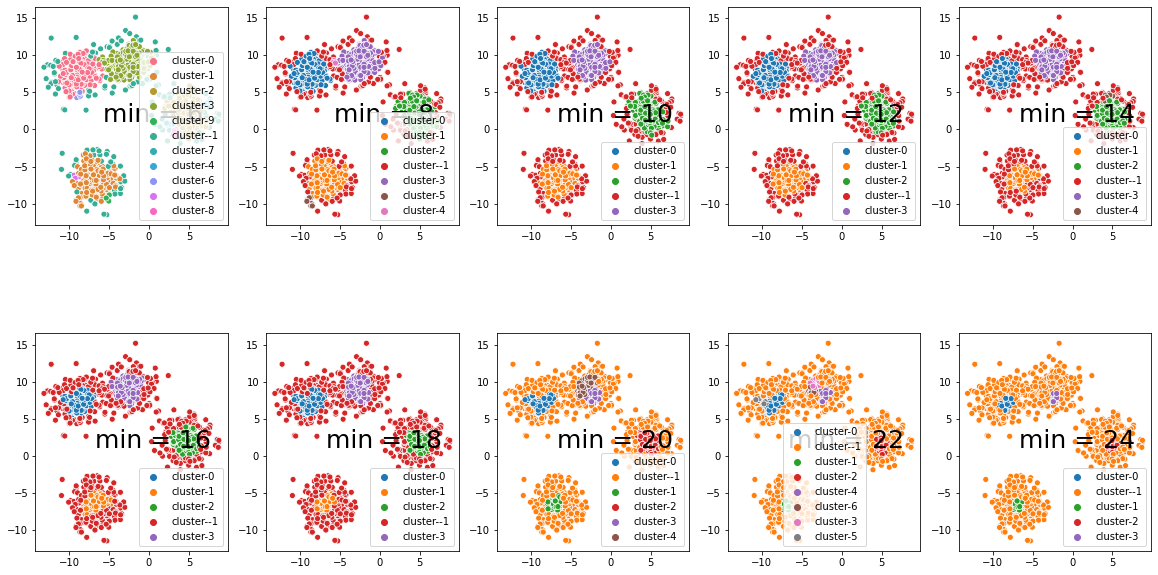

In [21]:
list_min = np.arange(6, 25, 2).tolist()


range_of_minsamples_dbscan(list_min, X_blobs, 0.65)

Se observa que los valores óptimos de min_samples se encuentran entre 6 y 20. 

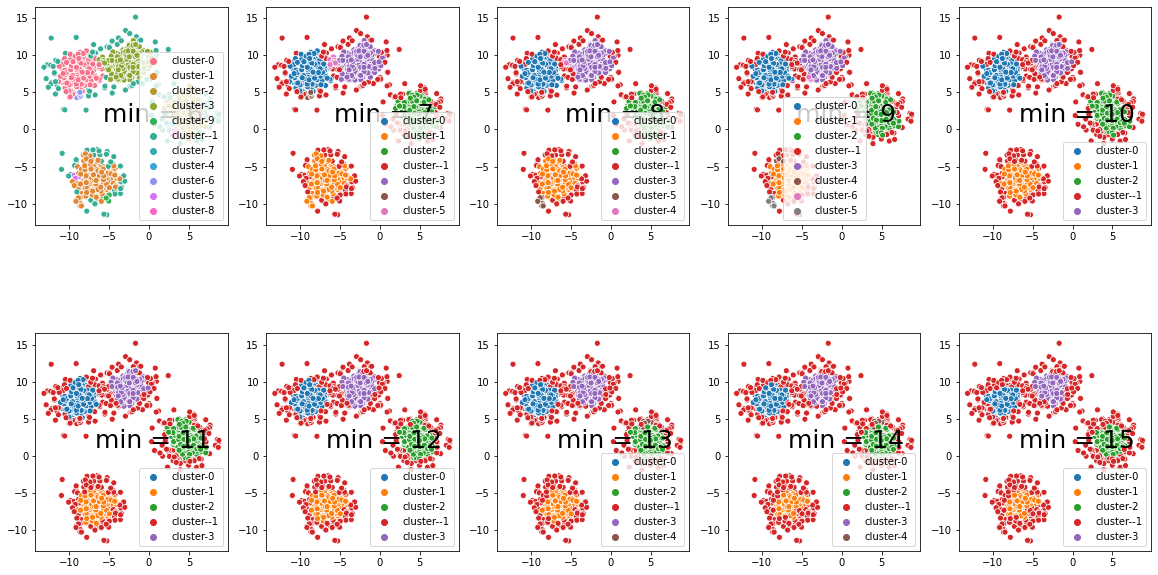

In [22]:
list_min = np.arange(6, 16, 1).tolist()


range_of_minsamples_dbscan(list_min, X_blobs, 0.65)

Análisis más detallado del parámetro min_samples. Se escoge un valor entre 6 y 9. Arbitrariamente, se escoge la medi aritmética de los dós números como primera aproximación. 

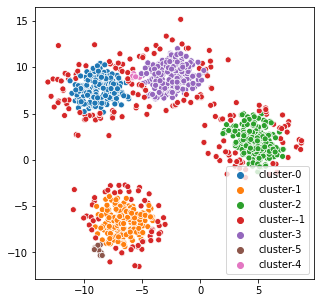

In [23]:
X, y = X_blobs, y_blobs

db = DBSCAN(eps=0.65
            
            , min_samples=7.5).fit(X)

labels = db.labels_
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Variación de eps:

Eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

Este valor determina el radio que delimita la zona donde la probabilidad de pertenenicia de un cluster es elevada. Como es de esperar, cuando el valor de epsilon aumenta; disminuirá el número de clusters.  

eps 0.1-0.4:

no hay separación de clusters. La distancia no es suficiente para diferenciar entre datos. 

eps 0.4 - 0.7:

se observa separación en los clusters.

eps > 0.7:

los clusters cada vez se hacen más grande

Análisis detallado entre eps 0.6 y 0.7:

No se observa variabilidad significativa dentro de este rango, y por tanto se utiliza como valor la media aritmetica de los dos extremos del rango. 


Variación de min_samples: 

min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

Número de muestrar por unidad de superfície. A mayor muestras, mayor superfície para pertenecer al cluster. 

min_samples 6 - 12:

Separación de clusters. 

min_samples 14 - 18:

Cada vez los clusters son más pequeños. Frontera de datos difuminada y separación de mala calidad. 

min_samples > 18: 

Fronteras difuminadas. No existe separación correcta de clusters. 

Análisis detallado min_samples 6 - 16:

Análisis visual. Entre 6 y 9 se encuentra una separación definida y visualmente correcta. Se decide como valor óptimo un valor de la media aritmética entre los dos extremos del rango: 7.5 .

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de DBScan jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Circles.
</div>

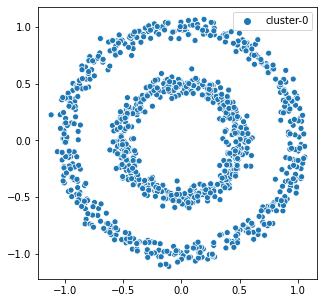

In [24]:
apply_dbsan(X_circles, y_circles, 0.65, 10)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

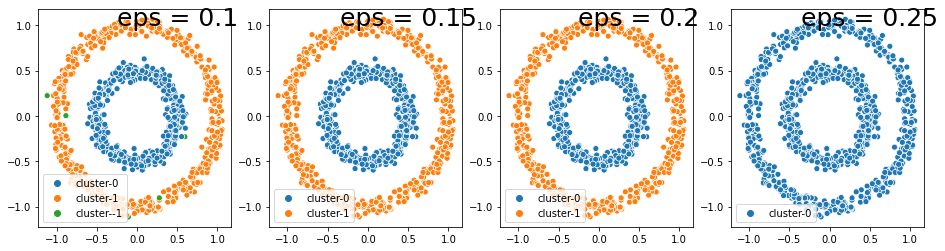

In [25]:
list_eps_circles = np.arange(0.1, 0.3, 0.05).tolist()
range_of_eps_dbscan(list_eps_circles, X_circles, 10)

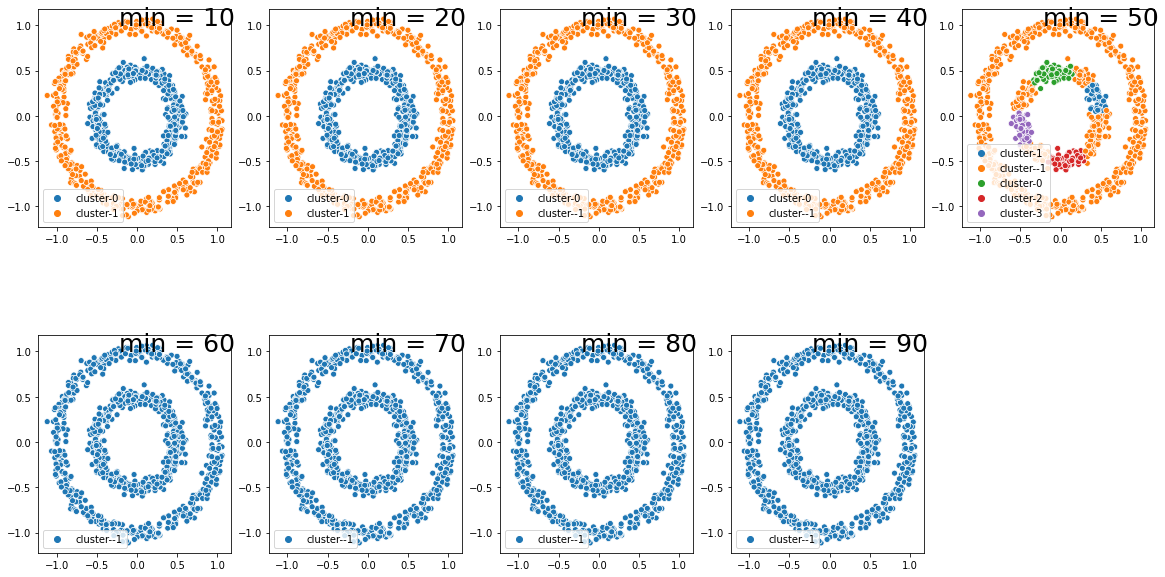

In [26]:
list_min_circles = np.arange(10, 100, 10).tolist()

range_of_minsamples_dbscan(list_min_circles, X_circles, 0.15)

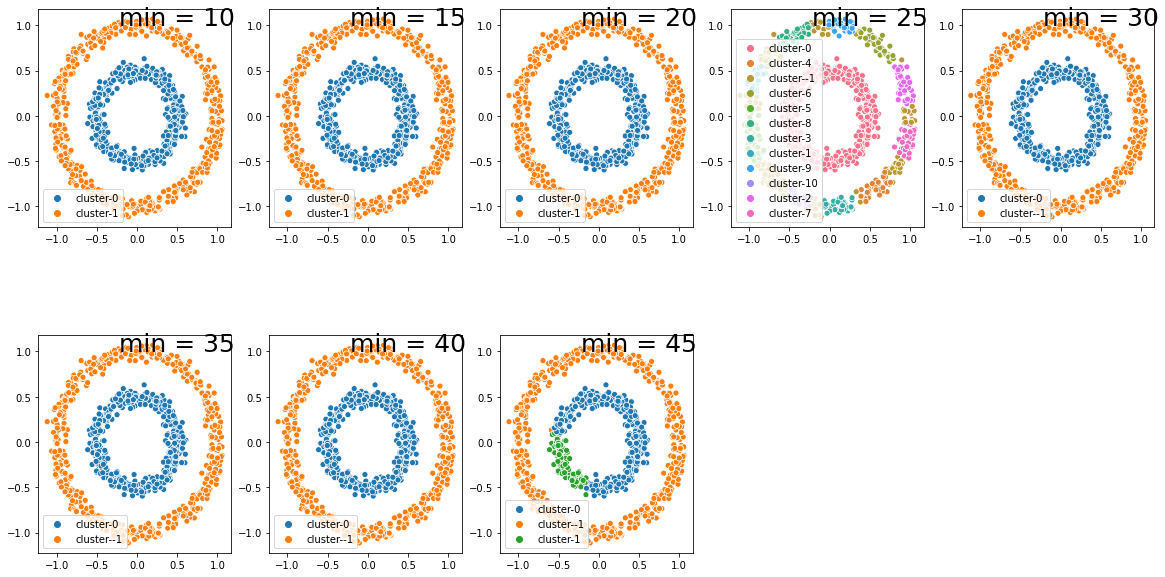

In [27]:
list_min_circles = np.arange(10, 50, 5).tolist()

range_of_minsamples_dbscan(list_min_circles, X_circles, 0.15)

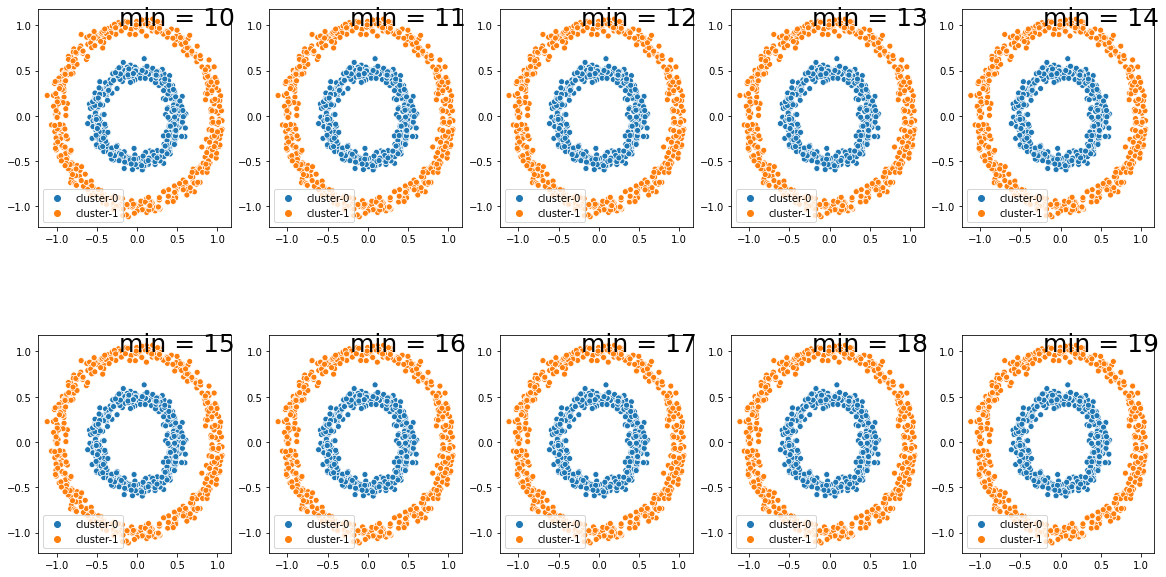

In [28]:
list_min_circles = np.arange(10, 20, 1).tolist()

range_of_minsamples_dbscan(list_min_circles, X_circles, 0.15)

Valor de epsilon: 0.15

Valor de min_samples: 15

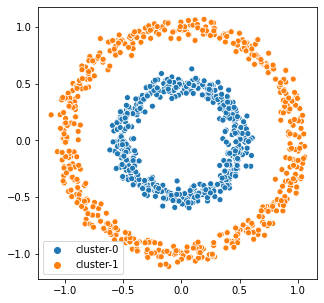

In [29]:
apply_dbsan(X_circles, y_circles, 0.15, 15)

### 1 c. Algoritmos jerárquicos

En este apartado se pide visualizar mediante un [dendrograma](https://en.wikipedia.org/wiki/Dendrogram) la construcción progresiva de los grupos mediante un algoritmo jerárquico aglomerativo (estrategia *bottom-up*). Con ello se pretende encontrar un método gráfico para entender el comportamiento del algoritmo y encontrar los *clusters* deseados en cada dataset.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Blobs.<br>
Puedes importar las librerías necesarias para ello.
</div>

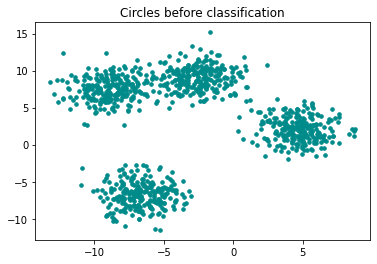

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, marker=".", c = "darkcyan")
plt.title("Circles before classification")
plt.show()


In [31]:
# generate the linkage matrix
Z = linkage(X_blobs, 'single')

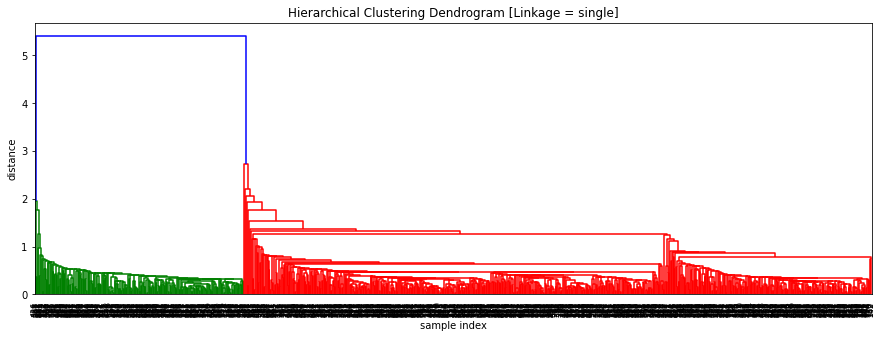

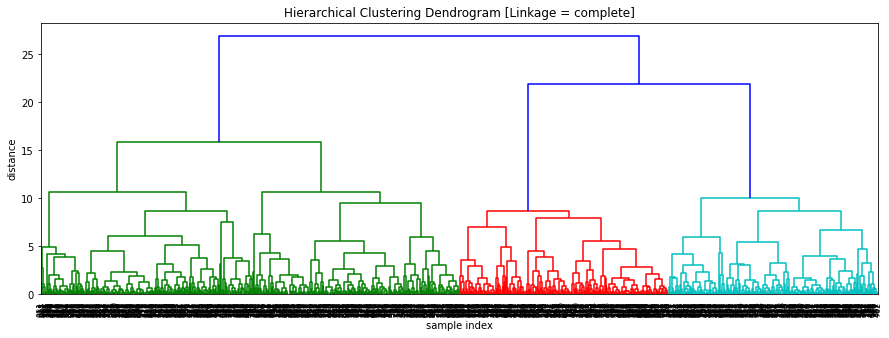

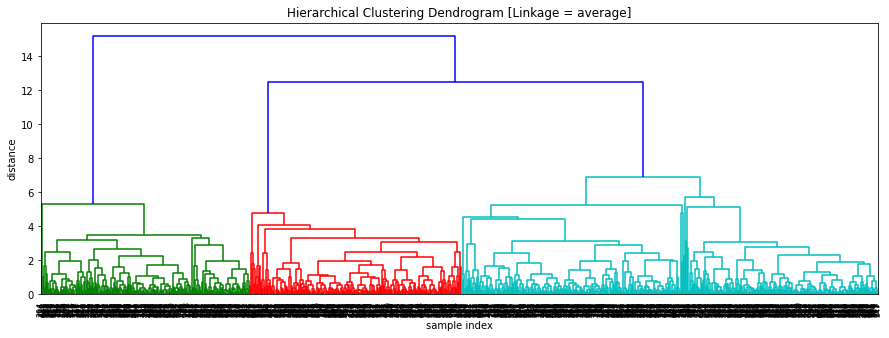

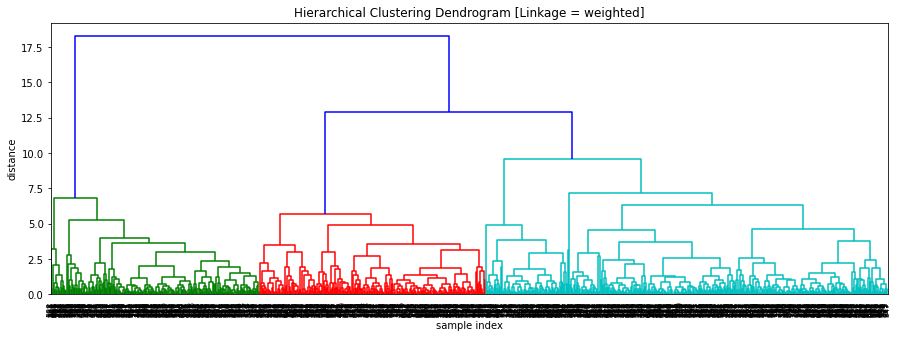

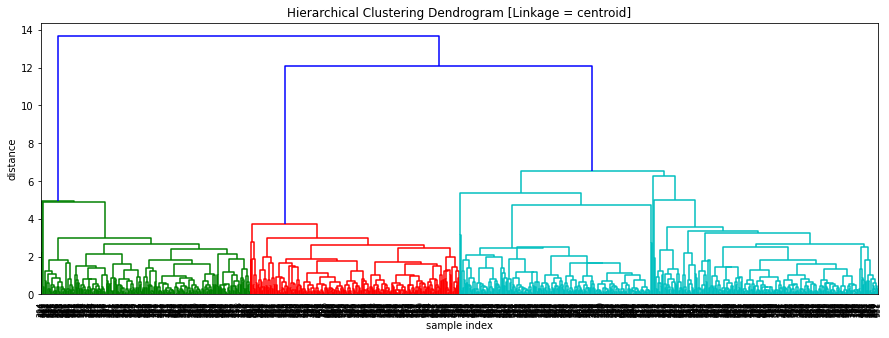

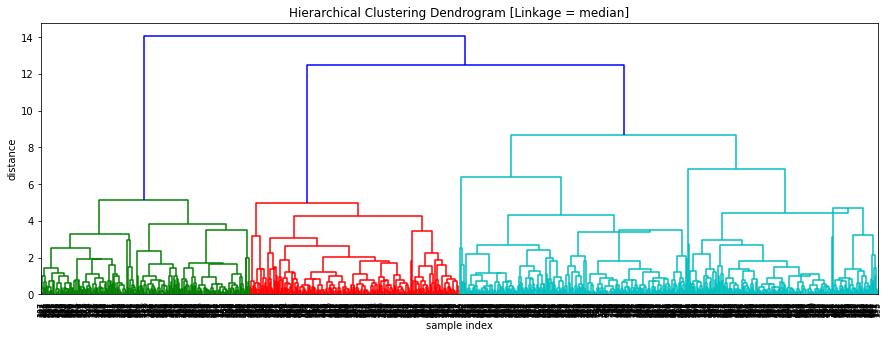

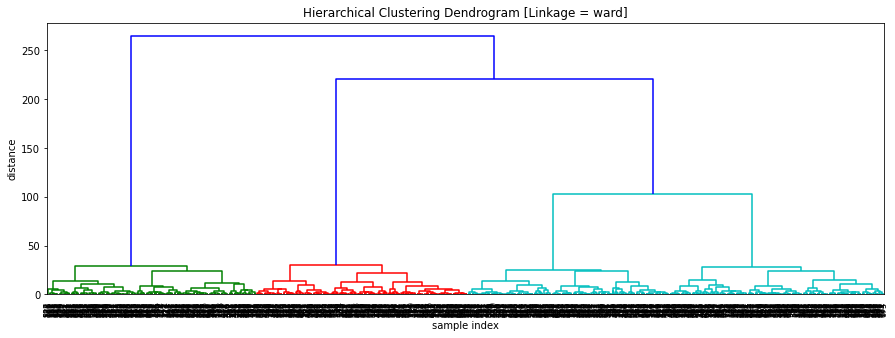

In [32]:
linkage_list = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

test_list = [linkage_list[1], linkage_list[2]]

def linkage_dendogram(linkage_type, X_train):
    
    for link in linkage_type:
        Z = linkage(X_train, link)

        plt.figure(figsize=(15, 5))
        plt.title(f'Hierarchical Clustering Dendrogram [Linkage = {link}]')
        plt.xlabel('sample index')
        plt.ylabel('distance')
       
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
        plt.show()

linkage_dendogram(linkage_list, X_blobs)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

Better pick Blobs Dataset: Distancia de ward
    
Distancia de Ward: method=’ward’ uses the Ward variance minimization algorithm (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

Al saber de antemano que necesitamos separar 4 clusters, se aprecia que la mejor separación nos la da la distancia de ward, ya que a distancias menores ya es capaz de clasificar correctamente la existencia de cuatro clusters. La distancia de Ward da muy buenos resultados debido a la optimización de la minimización de la varianza entre los puntos que acaban formando los distintos clusters. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Moons.<br>
Puedes importar las librerías necesarias para ello.
</div>

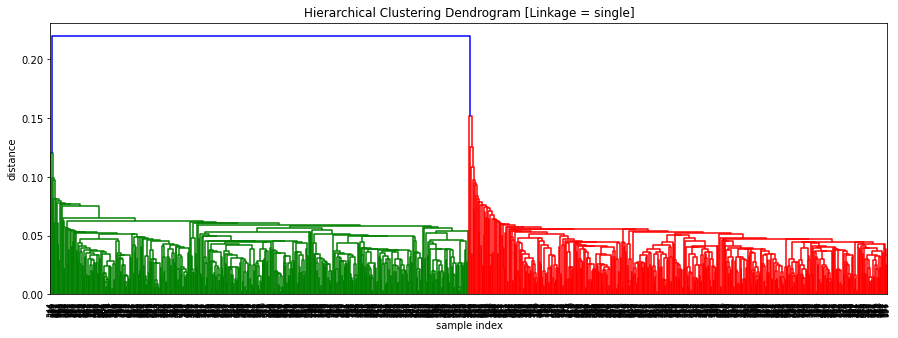

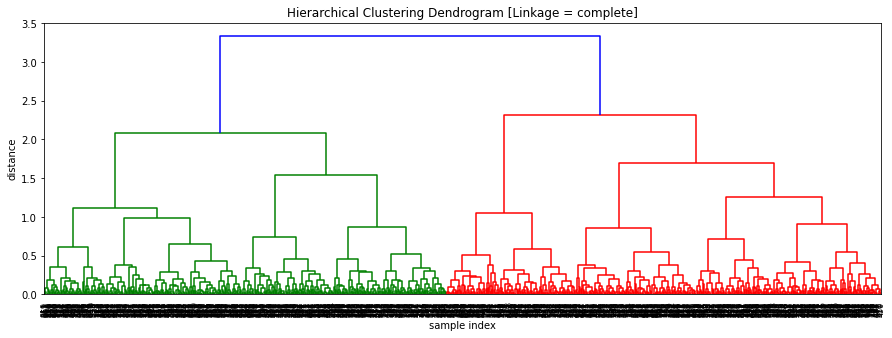

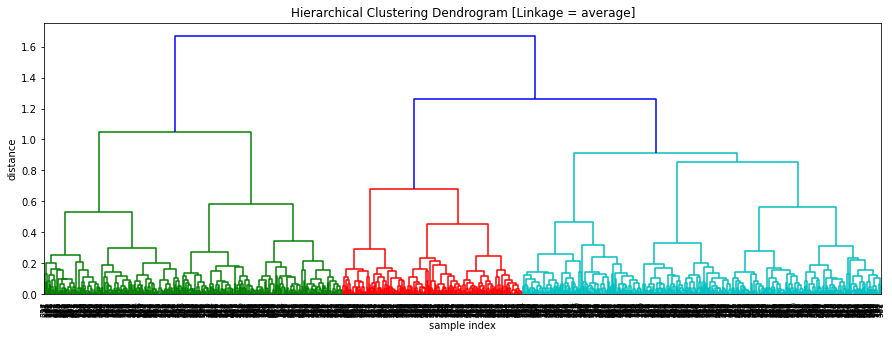

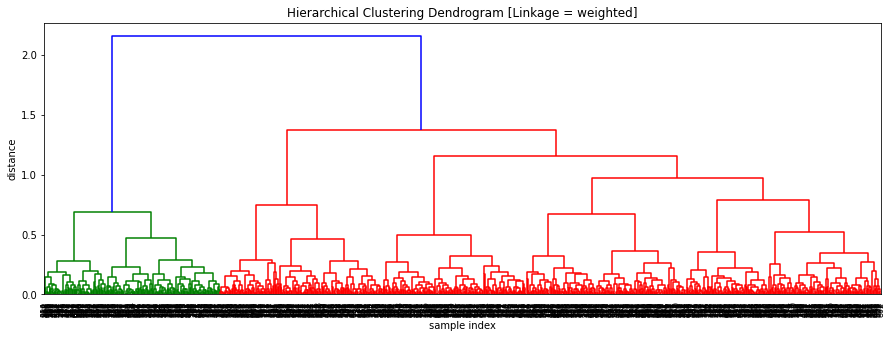

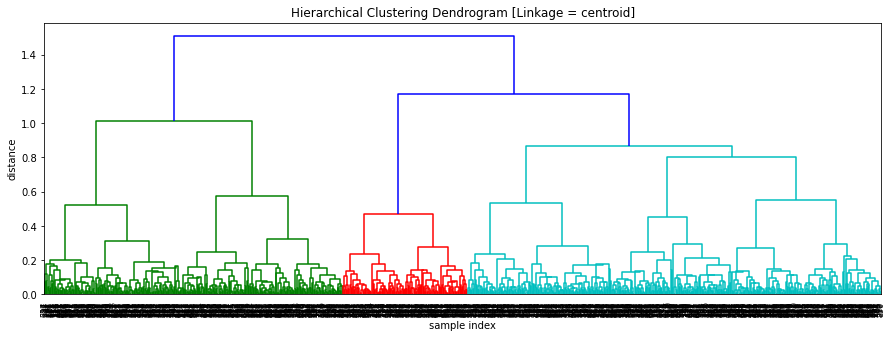

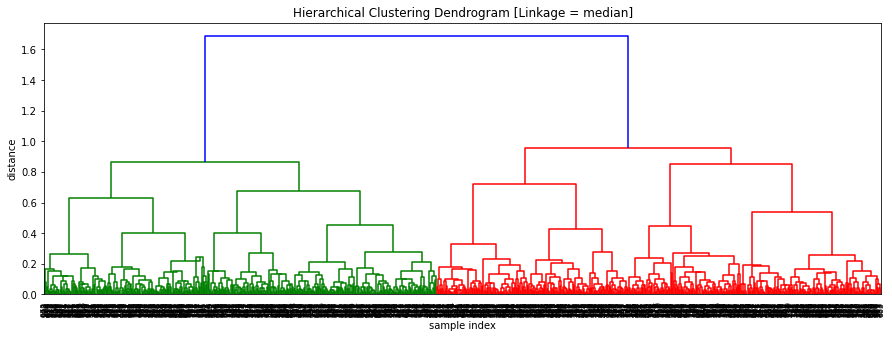

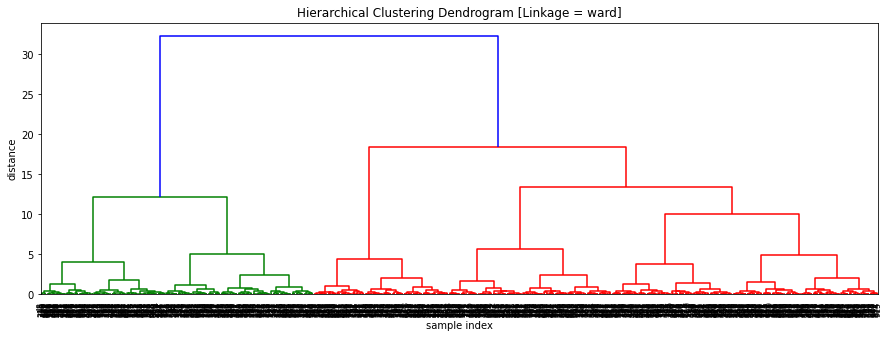

In [33]:
linkage_dendogram(linkage_list, X_moons)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

Better pick Moons Dataset: Single

In statistics, single-linkage clustering is one of several methods of hierarchical clustering. It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other.

A drawback of this method is that it tends to produce long thin clusters in which nearby elements of the same cluster have small distances, but elements at opposite ends of a cluster may be much farther from each other than two elements of other clusters. This may lead to difficulties in defining classes that could usefully subdivide the data.[1]

Referencia: https://en.wikipedia.org/wiki/Single-linkage_clustering

Referencia: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage



Al saber previamente que la densidad de puntos en los dos grupos es elevada, parece razonable que el tipo de linkage sea single, ya que su parámetro principal es la distancia euclídea. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Circles.<br>
Puedes importar las librerías necesarias para ello.
</div>

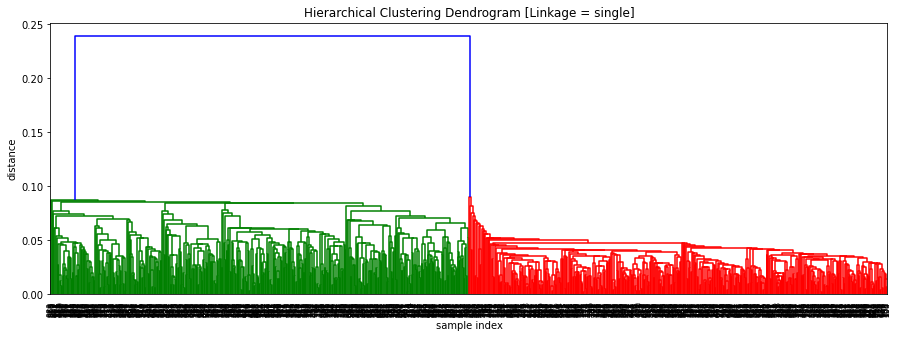

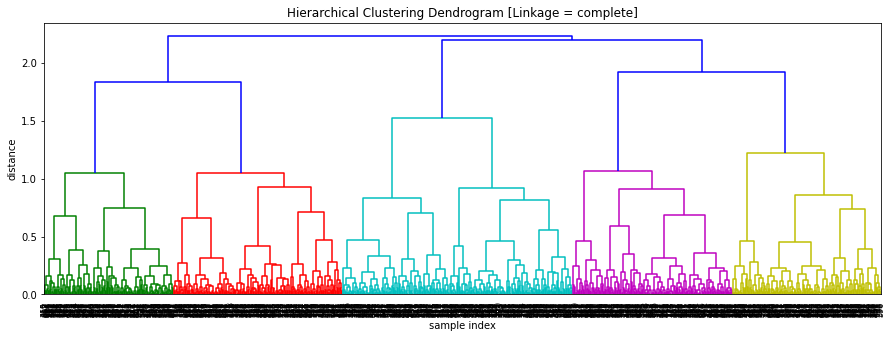

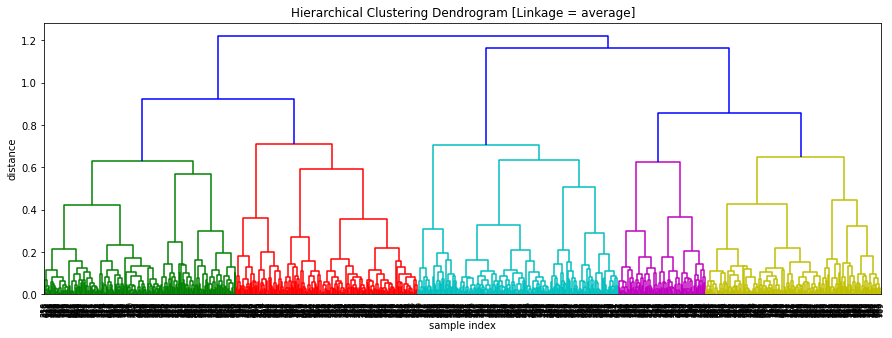

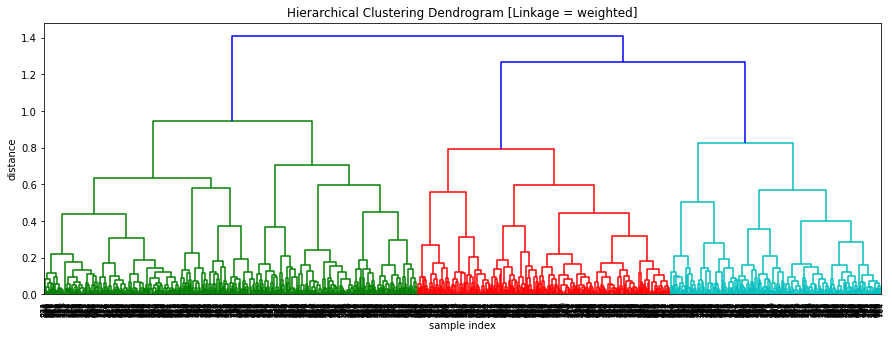

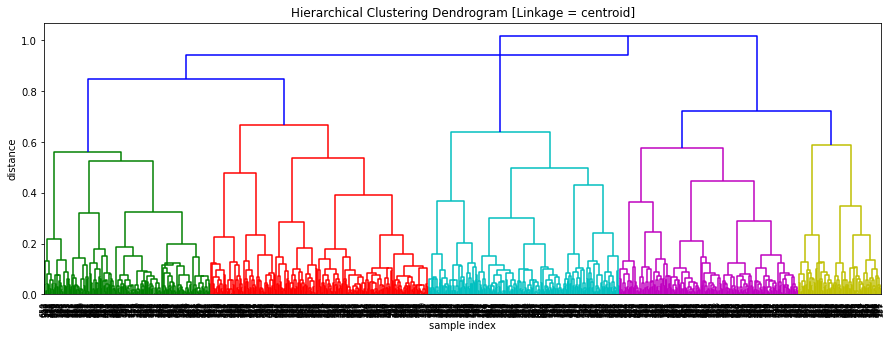

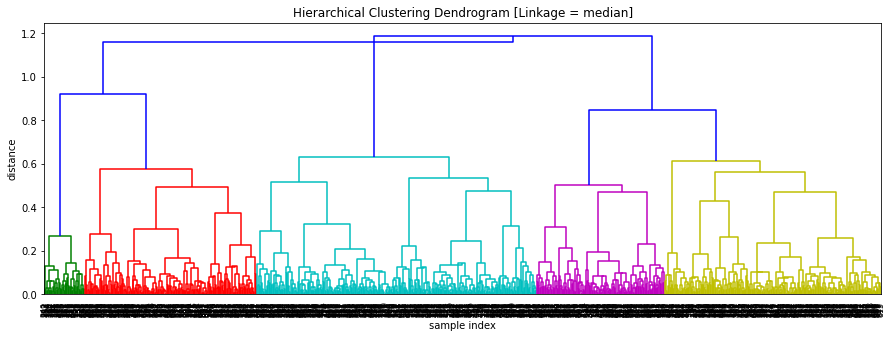

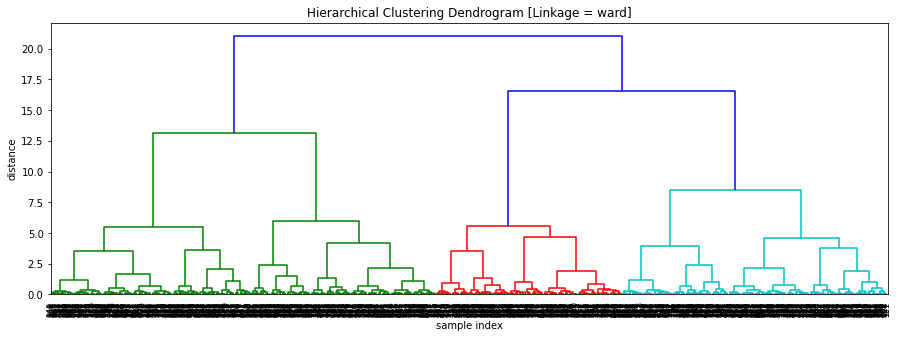

In [34]:
linkage_dendogram(linkage_list, X_circles)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

Better pick Circle Dataset: Single

In statistics, single-linkage clustering is one of several methods of hierarchical clustering. It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other.

A drawback of this method is that it tends to produce long thin clusters in which nearby elements of the same cluster have small distances, but elements at opposite ends of a cluster may be much farther from each other than two elements of other clusters. This may lead to difficulties in defining classes that could usefully subdivide the data.[1]

Referencia: https://en.wikipedia.org/wiki/Single-linkage_clustering
Referencia: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage



Al saber previamente que la densidad de puntos en los dos grupos es elevada, parece razonable que el tipo de linkage sea single, ya que su parámetro principal es la distancia euclídea. 


## 2. Aplicación de reducción de dimensionalidad para resolver un problema de optimización: t-SNE (2 puntos)

Como ya se ha visto, el algoritmo [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) ideado por [van der Maaten y Hinton](https://lvdmaaten.github.io/tsne/) difiere de PCA en que no trata de maximizar la varianza explicada. Intuitivamente, t-SNE trata de que la vecindad de un punto en baja dimensionalidad sea la misma que la original (mantenga las distancias). Partiendo de una localización aleatoria de cada punto, corrige su posición de forma iterativa tratando de minimizar la distancia a sus vecinos originales hasta converger.

Para ello, t-SNE dispone de diversos [parámetros](https://distill.pub/2016/misread-tsne/) que pueden modificar drásticamente el resultado. Por lo que se recomienda conocer su funcionamiento antes de aplicar la técnica.

Partiendo de las distancias entre las [provincias de la península ibérica](https://www.gifex.com/images/0X0/2009-12-02-11305/Provincias_de_Espana.jpg), presentes en el fichero de datos (en *pec2_2.p* un *DataFrame* de *pandas* en formato *pickle* o *pec2_2.csv* en formato *CSV*). Se pide calcular la matriz cuadrada que contenga la distancia de cada provincia contra las demás.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> la matriz debe tener tantas filas y columnas como provincias. Y cada celda debe contener la distancia entre las provincias de esa fila y columna.
</div>

In [35]:
provincias_df = pd.read_csv("/Users/Stephi/Documents/academic/UOC/tercer_semestre/minería/pec_2/pec2_2.csv")

provincias_df.head()

from                to        dist
0  A Coruña          A Coruña    0.000000
1  A Coruña          Albacete  724.856651
2  A Coruña  Alicante/Alacant  846.212163
3  A Coruña           Almería  840.615943
4  A Coruña          Asturias  203.994866

In [36]:
distancias = provincias_df["dist"]
to = provincias_df["to"].unique()
dimension = to.shape[0]

idx_row = 0
idx_column = 0

distance_array = np.zeros((dimension, dimension))
for distancia in distancias:
    distance_array[idx_row][idx_column] = distancia
    if idx_column % 49 == 0 and idx_column != 0:
        idx_row += 1
        idx_column = 0
    else:
        idx_column += 1

distance_array.shape #Matriz Cuadrada

(50, 50)

Una vez que se cuenta con la matriz de distancias, *t-SNE* tratará de mantener esas distancias entre los distintos puntos en baja dimensionalidad (en este caso 2 dimensiones). Emplazando los puntos en el plano mientras intenta mantener las distancias indicadas.

Dado que la entrada a [*t-SNE*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) se le pasa la matriz de distancias, no es necesario que las calcule. Por ello le indicaremos que la métrica a emplear es "precalculada".

Como *t-SNE* es un algoritmo estocástico (dos ejecuciones consecutivas con los mismos datos pueden conducir a resultados diferentes). Se pide realizar el proceso de ajuste con *t-SNE* 100 veces y quedarse con la ejecución con menor error (ver el atributo [*kl_divergence*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> jugar con los hiperparámetros de <i>t-SNE</i>, ejecutar 100 veces el ajuste de <i>t-SNE</i> y guardar el resultado de emplazamiento de provincias en el plano de la ejecución con menor error.
</div>

In [37]:
from sklearn.manifold import TSNE
import time 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_array)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 1819.300278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.638279
[t-SNE] KL divergence after 300 iterations: 0.944954
t-SNE done! Time elapsed: 0.0899500846862793 seconds


Una vez que se tienen las posiciones de las provincias en el plano, visualizar el resultado y analizar si el emplazamiento de las provincias calculado por *t-SNE* calculado en base a las distancias se parece al real.

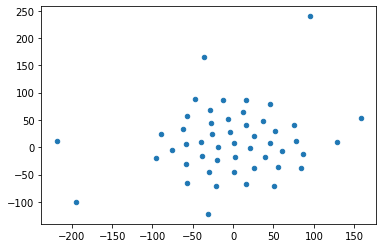

In [38]:
tsne_df = pd.DataFrame(data=tsne_results)
x = tsne_df[0]
y = tsne_df[1]

plt.scatter(x, y, s=20, alpha=1 )
plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> visualizar en un <i>scatter</i> las provincias de la ejecución con menor error, junto con su nombre para poder analizarlo.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿se parece a la distribución de provincias real? ¿por qué?
</div>

## 3. Aplicación: identificación de puntos de interés turísticos (4 puntos)

En este ejercicio se busca automatizar la localización de lugares turísticos a través de los metadatos de las fotografías de flickr.

Para ello se provee junto a la PEC el dataset: ``barcelona.csv``. Ya que se pide encontrar los puntos de mayor interés turístico de esta ciudad.

**Opcional: si quieres hacerlo para otra región**

Pero si quieres hacerlo para otra parte del mundo, puedes descargarte el dataset completo [aquí](https://drive.google.com/file/d/0B-mRR4rjwHPONVFfX2VmTmxZcHM/view?usp=sharing) y descomprime para extraer el *CSV*.

Para seleccionar las coordenadas de la zona de interés puedes usar la opción *Export* manual de [OpenStreetMaps](https://www.openstreetmap.org/).

Por último, para filtrar los datos que se corresponden a la zona deseada puedes usar el programa *AWK* mediante la siguiente línea:

``awk -F"," 'NR == 1 {print $5","$6} (NR > 1 && $5 > 41.3560 && $5 < 41.4267 && $6 > 2.1300 && $6 < 2.2319) {print $5","$6}' photo_metadata.csv``

``$5`` hace referencia a la latitud, y ``$6`` a la longitud. Sustituye los valores mínimo y máximo para obtener los datos de localización referentes a tu área de interés.

In [39]:
geo_df = pd.read_csv('/Users/Stephi/Documents/academic/UOC/tercer_semestre/minería/pec_2/barcelona.csv', header=0)
geo_df.sample(5)

latitude  longitude
8756  41.414523   2.154650
722   41.415054   2.154101
1796  41.383492   2.181844
1689  41.387370   2.169606
9634  41.402927   2.188332

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> siempre que tratamos un problema real, es necesario entender los datos a tratar. Visualiza las localizaciones de las fotografías mediante un scatter plot. Prueba distintos parámetros de tamaño (<i>size</i>) <i>s</i>, y opacidad <i>alpha</i> hasta conseguir un resultado fácil de interpretar. 
</div>

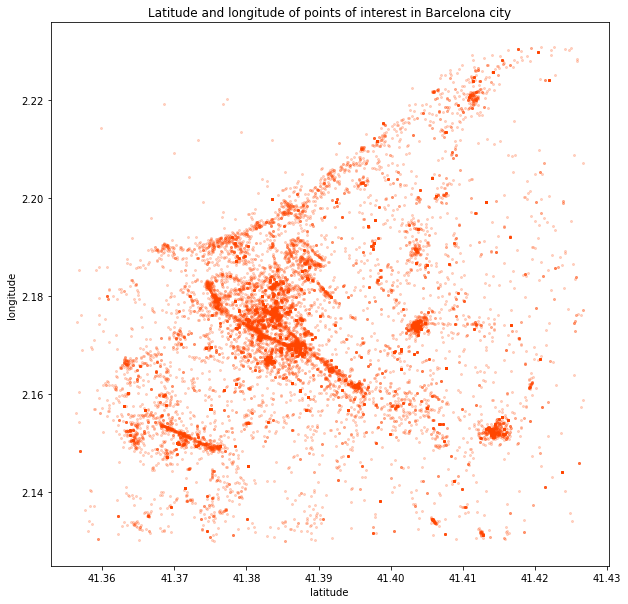

19316


In [40]:
latitude = geo_df["latitude"]
longitude = geo_df["longitude"]


plt.figure(figsize=(10,10))
plt.scatter(latitude, longitude, s=4, alpha=0.2, color = "orangered")
plt.title("Latitude and longitude of points of interest in Barcelona city")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()

print(len(latitude))

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> tras haber probado los algoritmos de agrupamiento en el ejercicio 1. ¿Qué algoritmo crees que sería más adecuado tras visualizar los datos? ¿Por qué?
</div>

DBScan

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> para prototipar el modelado primero se recomienda elegir un subconjunto de los datos que sea representativo. Selecciona una muestra del DataFrame original y visualiza como en el punto anterior para comprobar su similitud. 
</div>

In [41]:
from sklearn.preprocessing import StandardScaler

sample_size = int(0.25*geo_df.shape[0])

sample_df = geo_df.sample(n = sample_size) #4829 observaciones aleatorias
lat = sample_df["latitude"]
long = sample_df["longitude"]

lat_lon_matrix = np.column_stack((lat, long))
lat_lon_matrix = StandardScaler().fit_transform(lat_lon_matrix)

print(lat_lon_matrix.shape)

(4829, 2)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> ajusta el algoritmo de clustering elegido para encontrar los distintos grupos sobre el conjunto reducido, y visualiza el resultado coloreando cada punto en base al grupo al que pertenece. Como pista, alrededor de 20 clusters es un número razonable, y es posible darles un color distinto a cada uno con el <i>colormap: tab20</i>.
</div>

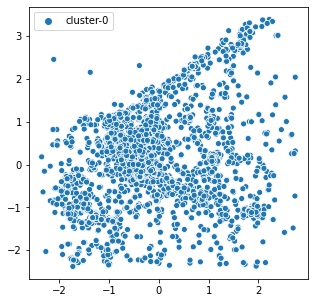

In [44]:
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps = 2, min_samples = 5).fit(lat_lon_matrix)

labels = db.labels_
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(lat_lon_matrix[:,0], lat_lon_matrix[:,1], hue=["cluster-{}".format(x) for x in labels])

plt.show()

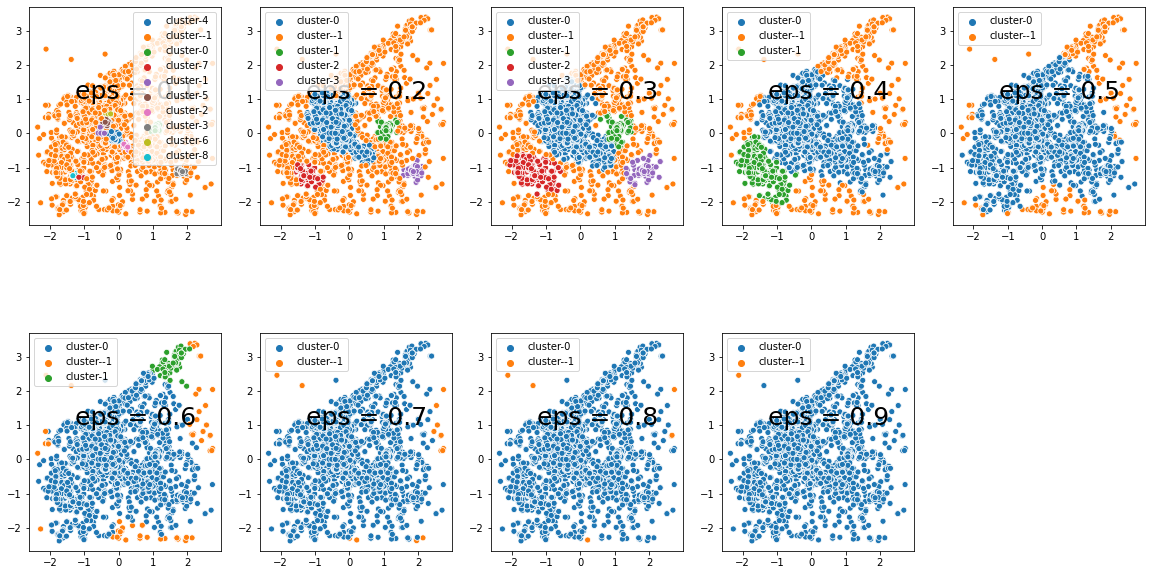

In [45]:
list_eps_bcn = np.arange(0.1, 1, 0.1).tolist()
range_of_eps_dbscan(list_eps_bcn, lat_lon_matrix, 100)

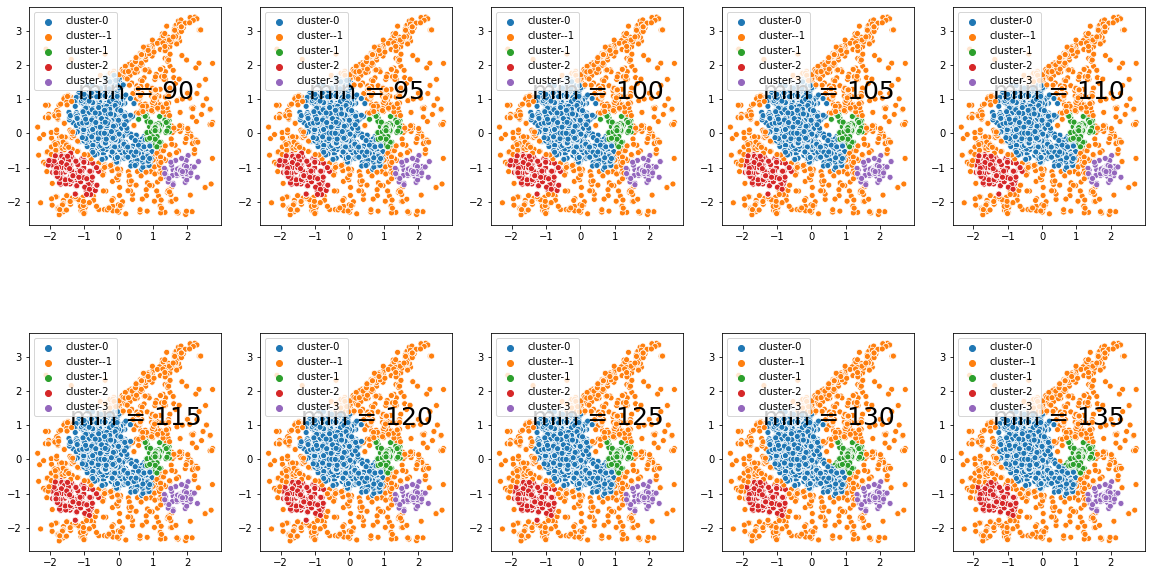

In [46]:
list_min_bcn = np.arange(90, 140, 5).tolist()
range_of_minsamples_dbscan(list_min_bcn, lat_lon_matrix, 0.3)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> interpreta cual es el lugar que representa cada <i>cluster</i> (si encuentras una asociación lógica).
</div>

Cluster rojo: Sants-Montjuic

Cluster naranja: Eixample, gracia

Cluster verde: Eixample, Sant martí

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>OPCIONAL Implementación:</strong> representa los puntos sin ruido sobre un mapa utilizando la librería <a href="https://pypi.org/project/smopy/">Smopy</a>. Para facilitar la interpretación, puedes representar cada cluster como el punto medio de todos los puntos que lo conforman.
</div>